In [2]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import default_rng
from numpy.random import SeedSequence
from fitter import Fitter
from scipy.stats import lognorm

In [3]:
from numpy.random import default_rng

In [4]:
DOI = ["loglaplace", "mielke", "kappa3", "burr", "burr12", "lognorm", "gamma", "expon", "cauchy", "exponpow"]

In [5]:
data = pd.read_excel("metal_tests.xlsx", na_values = "ND")
data.info()
data.to_csv("data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  1274 non-null   object 
 1   accessioning_type    1275 non-null   object 
 2   sample_id            1275 non-null   object 
 3   arsenic_ug_g         885 non-null    float64
 4   cadmium_ug_g         1072 non-null   float64
 5   lead_ug_g            1097 non-null   float64
 6   mercury_ug_g         961 non-null    float64
dtypes: float64(4), object(3)
memory usage: 69.9+ KB


In [6]:
flower = data.loc[(data.accessioning_type == "Flower") | (data.accessioning_type == "Leaf/Mixed Plant Material"),:].copy()
flower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-null    float64
 4   cadmium_ug_g         442 non-null    float64
 5   lead_ug_g            411 non-null    float64
 6   mercury_ug_g         352 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.3+ KB


In [7]:
floc = flower.replace("ND", np.nan)
floc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-null    float64
 4   cadmium_ug_g         442 non-null    float64
 5   lead_ug_g            411 non-null    float64
 6   mercury_ug_g         352 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.3+ KB


"	LOD	LOQ
Arsenic	0.042	0.138
Cadmium	0.016	0.052
Lead	0.042	0.142
Mercury	0.016	0.052
"

In [8]:
floc["Arsenic_LOD"] = 0.042
floc["Cadmium_LOD"] = 0.016
floc["Lead_LOD"] = 0.042
floc["Mercury_LOD"] = 0.016


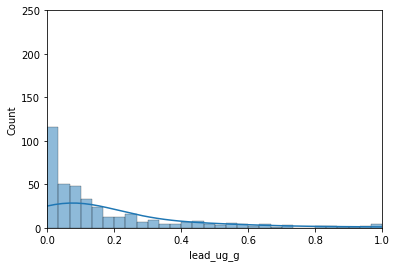

In [9]:
g = sb.histplot(data=floc, x = "lead_ug_g", bins= 90, binrange = (0,3), kde=True)
g.set(xlim=[0,1], ylim=[0,250])
plt.show()

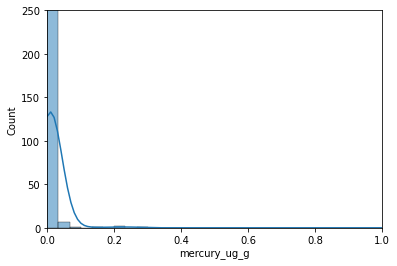

In [10]:
g = sb.histplot(data=floc, x = "mercury_ug_g", bins= 90, binrange = (0,3), kde=True)
g.set(xlim=[0,1], ylim=[0,250])
plt.show()

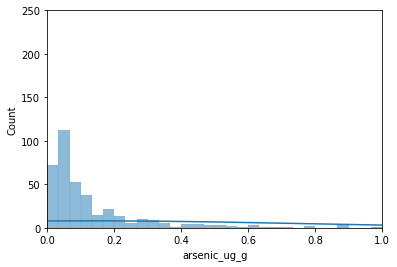

In [11]:
g = sb.histplot(data=floc, x = "arsenic_ug_g", bins= 90, binrange = (0,3), kde=True)
g.set(xlim=[0,1], ylim=[0,250])
plt.show()

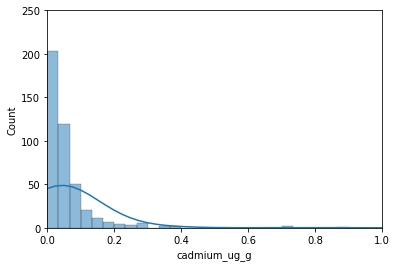

In [12]:
g = sb.histplot(data=floc, x = "cadmium_ug_g", bins= 90, binrange = (0,3), kde=True)
g.set(xlim=[0,1], ylim=[0,250])
plt.show()

,sumsquare_error,aic,bic,kl_div
loglaplace,22.147592,314.514642,-1085.362408,inf
mielke,33.100213,307.232937,-924.307542,inf
burr12,35.782675,305.017978,-894.228829,inf
lognorm,37.003239,294.788251,-887.237611,inf
cauchy,42.941763,433.488170,-835.741442,inf


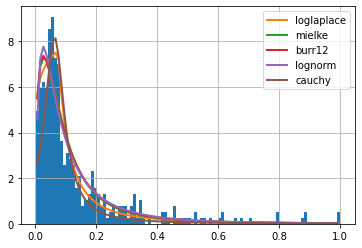

In [13]:
fa = Fitter(np.sort(floc.arsenic_ug_g.dropna().values)[5:-5], distributions=DOI, timeout=60)
fa.fit()
fa.summary()


,sumsquare_error,aic,bic,kl_div
mielke,13.807396,639.059265,-1463.197866,inf
burr12,13.844416,638.627415,-1462.041151,inf
lognorm,25.733050,716.574226,-1200.315269,inf
kappa3,31.279179,689.875146,-1115.999031,inf
loglaplace,47.868746,582.346657,-932.178647,inf


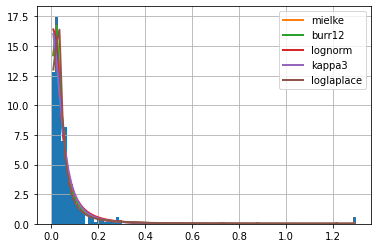

In [14]:
fc = Fitter(np.sort(floc.cadmium_ug_g.dropna().values)[5:-5], distributions=DOI, timeout=60)
fc.fit()
fc.summary()

,sumsquare_error,aic,bic,kl_div
kappa3,10132.362658,-175.401355,1176.432673,inf
lognorm,13210.389567,-52.680130,1267.154700,inf
expon,13966.819552,-237.567465,1280.362749,inf
exponpow,17080.108035,-117.099372,1355.018229,inf
cauchy,20476.400677,-208.224191,1411.208033,inf


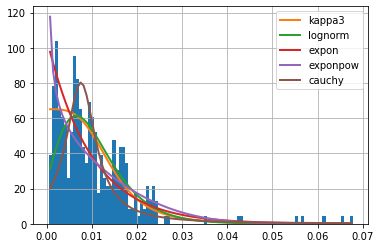

In [15]:
fm = Fitter(np.sort(floc.mercury_ug_g.dropna().values)[5:-5], distributions=DOI, timeout=60)
fm.fit()
fm.summary()

,sumsquare_error,aic,bic,kl_div
burr12,8.346116,471.126774,-1528.762400,inf
mielke,8.352463,433.656564,-1528.457559,inf
lognorm,8.578772,425.866815,-1523.731063,inf
burr,11.810266,448.060215,-1389.546063,inf
kappa3,13.815300,436.475021,-1332.660196,inf


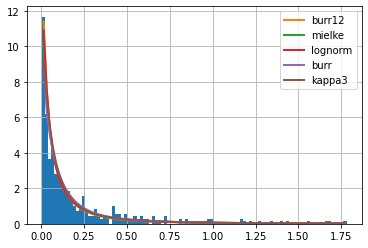

In [16]:
fl = Fitter(np.sort(floc.lead_ug_g.dropna().values)[5:-5], distributions=DOI, timeout=60)
fl.fit()
fl.summary()

{'lognorm': (1.0283536343075548, -0.00375393338877548, 0.0847535831509407)}


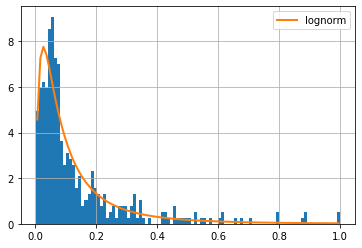

In [17]:
fa_n = Fitter(np.sort(floc.arsenic_ug_g.dropna().values)[5:-5], distributions="lognorm", timeout=60)
fa_n.fit()
fa_n.summary()
print(fa_n.fitted_param)

{'lognorm': (1.068046255645124, 0.0007842672443029607, 0.03699750123224785)}


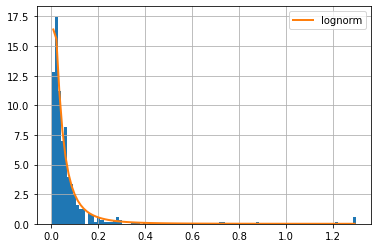

In [18]:
fc_n = Fitter(np.sort(floc.cadmium_ug_g.dropna().values)[5:-5], distributions="lognorm", timeout=60)
fc_n.fit()
fc_n.summary()
print(fc_n.fitted_param)


{'lognorm': (0.3601728175618527, -0.010397220328360945, 0.01925114042084152)}


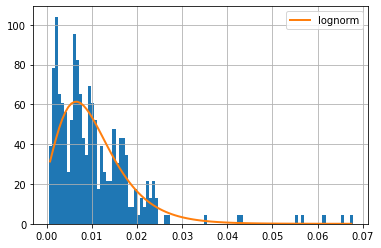

In [19]:
fm_n = Fitter(np.sort(floc.mercury_ug_g.dropna().values)[5:-5], distributions="lognorm", timeout=60)
fm_n.fit()
fm_n.summary()
print(fm_n.fitted_param)

{'lognorm': (1.5424875058480971, 0.00578299402671372, 0.07666114739180264)}


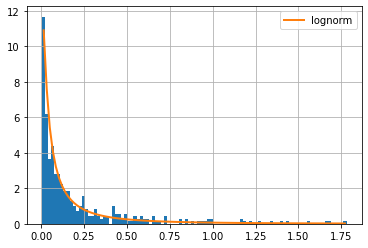

In [20]:
fl_n = Fitter(np.sort(floc.lead_ug_g.dropna().values)[5:-5], distributions="lognorm", timeout=60)
fl_n.fit()
fl_n.summary()
print(fl_n.fitted_param)

[(0.0, 2.0), (0.0, 200.0)]

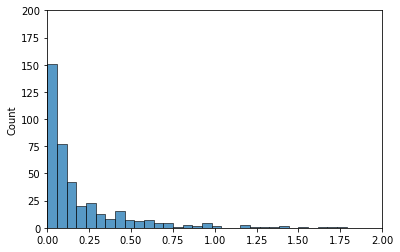

In [21]:
g = sb.histplot(np.sort(floc.lead_ug_g.dropna().values)[5:-5], binrange=(0,3))
g.set(xlim=[0,2], ylim=[0,200])

[(0.0, 2.0), (0.0, 200.0)]

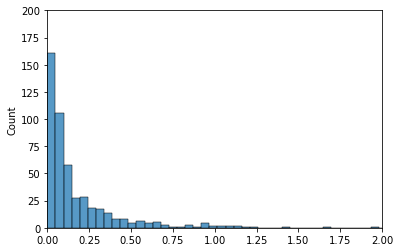

In [22]:
g = sb.histplot(lognorm.rvs(1.5424875058481, 0.00578299402671, 0.07666114739180, 500), binrange=(0,3))
g.set(xlim=[0,2], ylim=[0,200])

[(0.0, 2.0), (0.0, 3.0)]

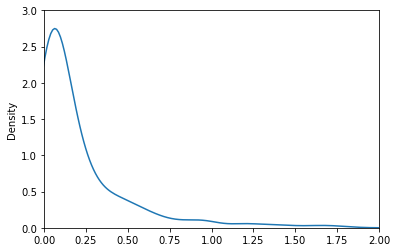

In [23]:
g = sb.kdeplot(np.sort(floc.lead_ug_g.dropna().values)[5:-5])
g.set(xlim=[0,2], ylim=[0,3])

[(0.0, 2.0), (0.0, 3.0)]

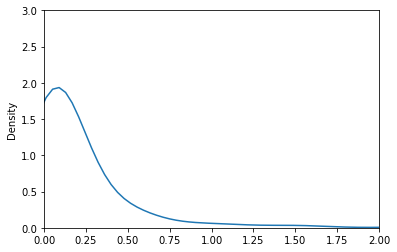

In [24]:
g = sb.kdeplot(lognorm.rvs(1.5424875058481, 0.00578299402671, 0.07666114739180, 500))
g.set(xlim=[0,2], ylim=[0,3])

In [25]:
d2 = pd.read_excel("data2a.xlsx", header = 1, na_values="ND")

In [26]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   client_id                          1884 non-null   int64         
 1   Category                           1884 non-null   object        
 2   Type                               1884 non-null   object        
 3   Date Completed                     1884 non-null   datetime64[ns]
 4   Metals Status                      1884 non-null   object        
 5   arsenic                            1318 non-null   float64       
 6   cadmium                            1240 non-null   float64       
 7   lead                               1331 non-null   float64       
 8   mercury                            251 non-null    float64       
 9   Unnamed: 9                         0 non-null      float64       
 10  Arsenic                            1

In [27]:
rng = default_rng()

In [28]:
def filler_m(mercury, Mercury_LOD):
    if np.isnan(mercury):
        mercury = rng.uniform(low = 0, high = Mercury_LOD)
    return mercury
    


In [29]:
def filler_a(arsenic, Arsenic_LOD):
    if np.isnan(arsenic):
        arsenic = rng.uniform(low = 0, high = Arsenic_LOD)
    return arsenic

In [30]:
def filler_c(cadmium, Cadmium_LOD):
    if np.isnan(cadmium):
        cadmium = rng.uniform(low = 0, high = Cadmium_LOD)
    return cadmium

In [31]:
def filler_l(lead, Lead_LOD):
    if np.isnan(lead):
        lead = rng.uniform(low = 0, high = Lead_LOD)
    return lead

In [32]:
# d2t = d2.iloc[:,5:9].copy()/1000
d2t = d2.select_dtypes(exclude=['object', "datetime"]).copy()/1000
d2t["mercury"] = d2t.apply(lambda x: filler_m(x['mercury'],x['Mercury_LOD']),axis=1)
d2t["lead"] = d2t.apply(lambda x: filler_l(x['lead'],x['Lead_LOD']),axis=1)
d2t["cadmium"] = d2t.apply(lambda x: filler_c(x['cadmium'],x['Cadmium_LOD']),axis=1)
d2t["arsenic"] = d2t.apply(lambda x: filler_a(x['arsenic'],x['Arsenic_LOD']),axis=1)

In [33]:
d2t.iloc[:,1:5].to_csv("cali_data.csv", index=None)

In [34]:
d2t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    1884 non-null   float64
 1   arsenic      1884 non-null   float64
 2   cadmium      1884 non-null   float64
 3   lead         1884 non-null   float64
 4   mercury      1884 non-null   float64
 5   Unnamed: 9   0 non-null      float64
 6   Arsenic      1884 non-null   float64
 7   Cadmium      1884 non-null   float64
 8   Lead         1884 non-null   float64
 9   Mercury      1884 non-null   float64
 10  Unnamed: 14  0 non-null      float64
 11  Unnamed: 16  0 non-null      float64
 12  Arsenic_LOD  1884 non-null   float64
 13  Cadmium_LOD  1884 non-null   float64
 14  Lead_LOD     1884 non-null   float64
 15  Mercury_LOD  1884 non-null   float64
 16  Unnamed: 21  0 non-null      float64
 17  Arsenic_LOQ  1884 non-null   float64
 18  Cadmium_LOQ  1884 non-null   float64
 19  Lead_L

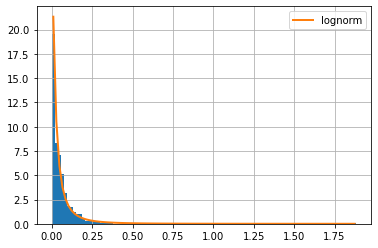

{'lognorm': (1.2973193079492664, -0.0008669116053331418, 0.02974112971457259)}


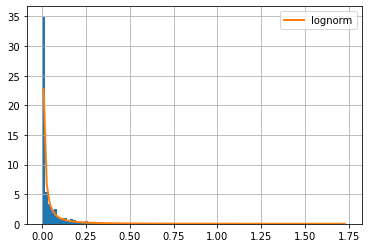

{'lognorm': (2.0225630864216604, 3.326195563888346e-05, 0.009283953901894558)}


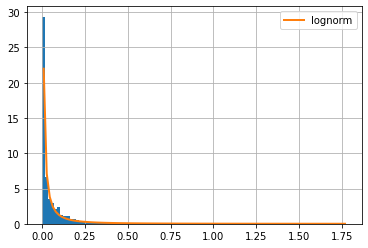

{'lognorm': (1.9893563550986824, 1.651889691136442e-05, 0.013844754645114251)}


{'lognorm': (1.0517427867403955, -0.00025904764617653284, 0.004750576667086431)}


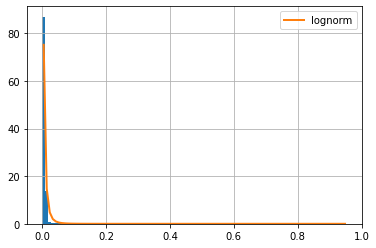

In [35]:
fa_n2 = Fitter(np.sort(d2t.arsenic.dropna().values)[5:-5], distributions="lognorm", timeout=60)
fa_n2.fit()
fa_n2.summary()
plt.show()
print(fa_n2.fitted_param)
fc_n2 = Fitter(np.sort(d2t.cadmium.dropna().values)[5:-5], distributions="lognorm", timeout=60)
fc_n2.fit()
fc_n2.summary()
plt.show()
print(fc_n2.fitted_param)
fl_n2 = Fitter(np.sort(d2t.lead.dropna().values)[5:-5], distributions="lognorm", timeout=60)
fl_n2.fit()
fl_n2.summary()
plt.show()
print(fl_n2.fitted_param)
fm_n2 = Fitter(np.sort(d2t.mercury.dropna().values)[5:-5], distributions="lognorm", timeout=60)
fm_n2.fit()
fm_n2.summary()
print(fm_n2.fitted_param)
plt.show()

{'lognorm': (2.0225630864216604, 3.326195563888346e-05, 0.009283953901894558)}


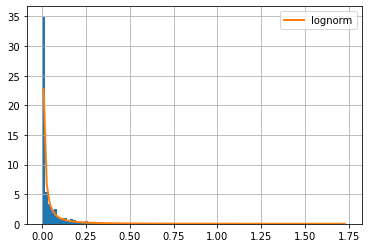

In [36]:
fc_n2 = Fitter(np.sort(d2t.cadmium.dropna().values)[5:-5], distributions="lognorm", timeout=60)
fc_n2.fit()
fc_n2.summary()
print(fc_n2.fitted_param)

In [37]:
test_gen = np.random.default_rng()
test_cad = test_gen.lognormal()


In [38]:
print(dir(fc_n2))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_aic', '_alldata', '_bic', '_data', '_density', '_fitted_errors', '_get_xmax', '_get_xmin', '_init', '_kldiv', '_load_all_distributions', '_set_xmax', '_set_xmin', '_timed_run', '_trim_data', '_update_data_pdf', '_xmax', '_xmin', 'bins', 'df_errors', 'distributions', 'fit', 'fitted_param', 'fitted_pdf', 'get_best', 'hist', 'plot_pdf', 'summary', 'timeout', 'x', 'xmax', 'xmin', 'y']


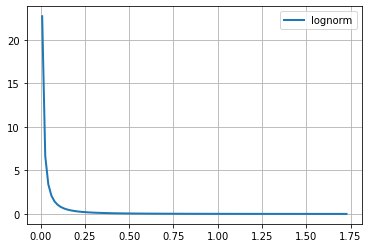

In [39]:
fc_n2.plot_pdf()

In [40]:
fc_n2.fitted_pdf

{'lognorm': array([2.27003064e+01, 6.64998563e+00, 3.39799430e+00, 2.10868860e+00,
        1.45011157e+00, 1.06351404e+00, 8.15420460e-01, 6.45958801e-01,
        5.24720365e-01, 4.34818387e-01, 3.66219534e-01, 3.12637431e-01,
        2.69960751e-01, 2.35403716e-01, 2.07021668e-01, 1.83422186e-01,
        1.63586148e-01, 1.46753233e-01, 1.32346556e-01, 1.19921803e-01,
        1.09132163e-01, 9.97036472e-02, 9.14174291e-02, 8.40970010e-02,
        7.75986965e-02, 7.18046065e-02, 6.66172205e-02, 6.19553276e-02,
        5.77508488e-02, 5.39463664e-02, 5.04931802e-02, 4.73497655e-02,
        4.44805402e-02, 4.18548731e-02, 3.94462797e-02, 3.72317666e-02,
        3.51912941e-02, 3.33073324e-02, 3.15644945e-02, 2.99492293e-02,
        2.84495656e-02, 2.70548964e-02, 2.57557969e-02, 2.45438699e-02,
        2.34116151e-02, 2.23523163e-02, 2.13599456e-02, 2.04290804e-02,
        1.95548326e-02, 1.87327863e-02, 1.79589446e-02, 1.72296829e-02,
        1.65417079e-02, 1.58920227e-02, 1.52778947e-0

In [41]:
gen_c = stats.lognorm.rvs(1.9846025079524758, 5.304799853999842e-05, 0.009563024395780918, size=2000)

(0.0, 0.2)

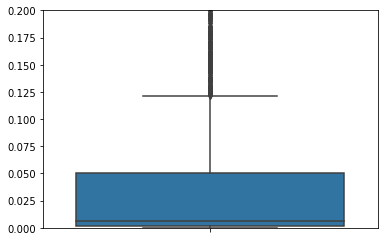

In [42]:
g= sb.boxplot(y=d2t.cadmium.values)
g.set_ylim([0,0.2])

(0.0, 0.2)

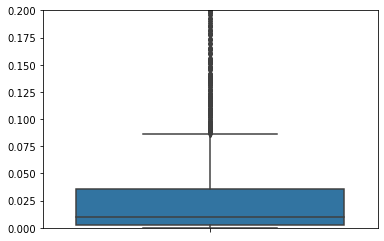

In [43]:
g= sb.boxplot(y=gen_c)
g.set_ylim([0,0.2])

            sumsquare_error          aic          bic  kl_div
cauchy            40.405050  1095.887762 -7175.233375     inf
loglaplace        67.862026   714.972595 -6195.987622     inf
kappa3           130.727646   666.737092 -4967.319191     inf
mielke           134.942638   660.350755 -4900.314473     inf
lognorm          153.295296   703.461598 -4668.884721     inf
{'loglaplace': (0.5978145793492331, -0.00011233855543594739, 0.006112351531167981), 'mielke': (1.1521070615577433, 0.7283931903522821, 3.740216763328488e-05, 0.0036535293540417243), 'kappa3': (0.7641265934395898, 3.784855158104172e-05, 0.007557365346713139), 'burr': (1.1627190762050936, 0.16624134533419574, 3.784864398729226e-05, 1.4622255660212642), 'burr12': (0.626495594487479, 3.026458535915199, 3.784864398729226e-05, 0.0981224001481216), 'lognorm': (2.0225630864216604, 3.326195563888346e-05, 0.009283953901894558), 'gamma': (0.18287202637044184, 3.784864398729226e-05, 1.260537993413231), 'expon': (3.7848643987292265e-

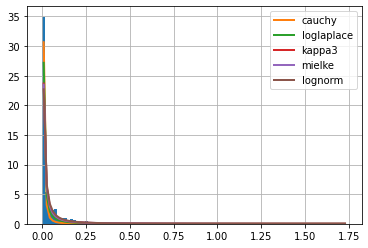

In [44]:
fc_n2 = Fitter(np.sort(d2t.cadmium.dropna().values)[5:-5], distributions= DOI, timeout=60)
fc_n2.fit()
print(fc_n2.summary())
print(fc_n2.fitted_param)

            sumsquare_error          aic          bic  kl_div
cauchy            40.405050  1095.887762 -7175.233375     inf
loglaplace        67.862026   714.972595 -6195.987622     inf
kappa3           130.727646   666.737092 -4967.319191     inf
mielke           134.942638   660.350755 -4900.314473     inf
lognorm          153.295296   703.461598 -4668.884721     inf


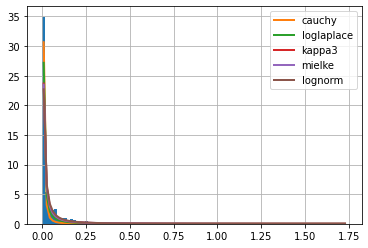

In [45]:
print(fc_n2.summary())

In [46]:
gen_c = stats.cauchy.rvs(0.003553434318951407, 0.005381209623693551, size=2000)

(0.0, 0.2)

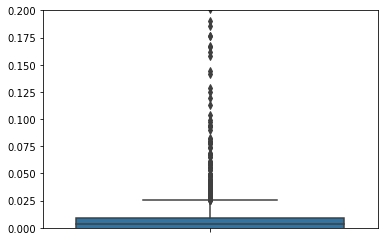

In [47]:
g= sb.boxplot(y=gen_c)
g.set_ylim([0,0.2])

(0.0, 0.2)

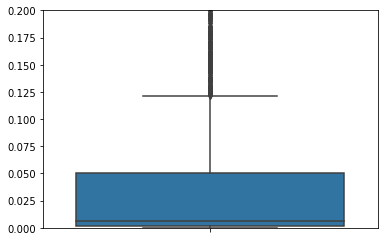

In [48]:
g= sb.boxplot(y=d2t.cadmium.values)
g.set_ylim([0,0.2])

In [49]:
def booter(sample_count: int, dist: np.array) -> np.array:
    boot_gen = np.random.default_rng()
    sample = np.empty(sample_count)
    for i in np.arange(0, sample_count):
        ind = boot_gen.integers(0, len(dist)-1,size=1)
        sample[i] = dist[ind].copy()
    return sample




In [50]:
draw = booter(len(d2t.cadmium.values), d2t.cadmium.values)


In [110]:
test2 = pd.DataFrame({"sim":draw, "real":d2t.cadmium.values})

(0.0, 2.0)

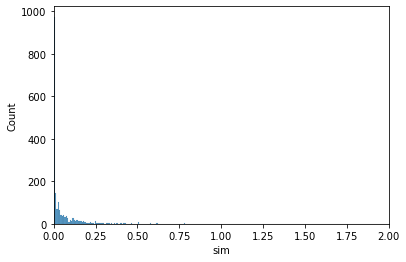

In [111]:
g = sb.histplot(data= test2.sim)
g.set_xlim([0,2])

(0.0, 2.0)

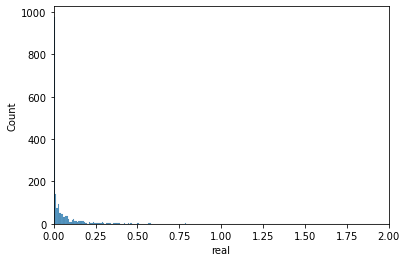

In [112]:
g = sb.histplot(data= test2.real)
g.set_xlim([0,2])

In [113]:
test2.describe()

,sim,real
count,1884.000000,1884.000000
mean,0.066028,0.061607
std,0.288850,0.234712
min,0.000004,0.000004
25%,0.002099,0.002088
50%,0.006000,0.006000
75%,0.051250,0.050000
max,6.425000,6.425000


In [114]:
test2["t1"] = booter(len(test2), d2t.cadmium.values)
test2["t2"] = booter(len(test2), d2t.cadmium.values)
test2["t3"] = booter(len(test2), d2t.cadmium.values)

test2.describe()

,sim,real,t1,t2,t3
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,0.066028,0.061607,0.064095,0.065367,0.052659
std,0.288850,0.234712,0.239906,0.282833,0.198464
min,0.000004,0.000004,0.000012,0.000004,0.000012
25%,0.002099,0.002088,0.002312,0.002075,0.002000
50%,0.006000,0.006000,0.007000,0.006000,0.006000
75%,0.051250,0.050000,0.052000,0.045000,0.044000
max,6.425000,6.425000,6.425000,6.425000,6.425000


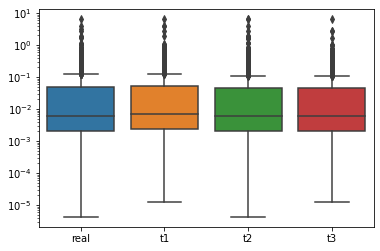

In [115]:
g = sb.boxplot(data=test2.iloc[:,1:])
g.set_yscale("log")

In [57]:
floc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-null    float64
 4   cadmium_ug_g         442 non-null    float64
 5   lead_ug_g            411 non-null    float64
 6   mercury_ug_g         352 non-null    float64
 7   Arsenic_LOD          453 non-null    float64
 8   Cadmium_LOD          453 non-null    float64
 9   Lead_LOD             453 non-null    float64
 10  Mercury_LOD          453 non-null    float64
dtypes: float64(8), object(3)
memory usage: 42.5+ KB


In [58]:
floc["mercury"] = floc.apply(lambda x: filler_m(x['mercury_ug_g'],x['Mercury_LOD']),axis=1)
floc["lead"] = floc.apply(lambda x: filler_l(x['lead_ug_g'],x['Lead_LOD']),axis=1)
floc["cadmium"] = floc.apply(lambda x: filler_c(x['cadmium_ug_g'],x['Cadmium_LOD']),axis=1)
floc["arsenic"] = floc.apply(lambda x: filler_a(x['arsenic_ug_g'],x['Arsenic_LOD']),axis=1)
floc.to_csv("wash_data.csv", index=None)

In [59]:
floc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date_received  453 non-null    object 
 1   accessioning_type    453 non-null    object 
 2   sample_id            453 non-null    object 
 3   arsenic_ug_g         396 non-null    float64
 4   cadmium_ug_g         442 non-null    float64
 5   lead_ug_g            411 non-null    float64
 6   mercury_ug_g         352 non-null    float64
 7   Arsenic_LOD          453 non-null    float64
 8   Cadmium_LOD          453 non-null    float64
 9   Lead_LOD             453 non-null    float64
 10  Mercury_LOD          453 non-null    float64
 11  mercury              453 non-null    float64
 12  lead                 453 non-null    float64
 13  cadmium              453 non-null    float64
 14  arsenic              453 non-null    float64
dtypes: float64(12), object(3)
memory usage:

In [62]:
summa_w = floc.iloc[:,3:7]
summa_c = d2.iloc[:,5:9]
summa_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   arsenic  1318 non-null   float64
 1   cadmium  1240 non-null   float64
 2   lead     1331 non-null   float64
 3   mercury  251 non-null    float64
dtypes: float64(4)
memory usage: 59.0 KB


In [61]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   client_id                          1884 non-null   int64         
 1   Category                           1884 non-null   object        
 2   Type                               1884 non-null   object        
 3   Date Completed                     1884 non-null   datetime64[ns]
 4   Metals Status                      1884 non-null   object        
 5   arsenic                            1318 non-null   float64       
 6   cadmium                            1240 non-null   float64       
 7   lead                               1331 non-null   float64       
 8   mercury                            251 non-null    float64       
 9   Unnamed: 9                         0 non-null      float64       
 10  Arsenic                            1

In [85]:
# summa_c = summa_c/1000
summa_c.quantile(.75, axis  =0)

arsenic    0.1000
cadmium    0.0860
lead       0.1040
mercury    0.0345
Name: 0.75, dtype: float64

In [89]:
qc = d2t.iloc[:,1:5]
qw = floc.iloc[:,11:]
qw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1271
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mercury  453 non-null    float64
 1   lead     453 non-null    float64
 2   cadmium  453 non-null    float64
 3   arsenic  453 non-null    float64
dtypes: float64(4)
memory usage: 17.7 KB


In [103]:
qc.quantile(.95, axis = 0)

arsenic    0.19600
cadmium    0.25685
lead       0.29040
mercury    0.01600
Name: 0.95, dtype: float64

In [116]:
d2t.filter(like="LOQ").describe()

,Arsenic_LOQ,Cadmium_LOQ,Lead_LOQ,Mercury_LOQ
count,1884.000000,1884.000000,1884.000000,1884.000000
mean,0.037381,0.009277,0.009094,0.027826
std,0.017365,0.004453,0.003117,0.008460
min,0.009000,0.002000,0.004000,0.014000
25%,0.009000,0.002000,0.004000,0.014000
50%,0.048000,0.012000,0.011000,0.033000
75%,0.048000,0.012000,0.011000,0.033000
max,0.048000,0.012000,0.011000,0.033000
